# Práctica 4.5
## [Introducción a los sistema inteligentes](https://fagonzalezo.github.io/)
### Universidad Nacional de Colombia

### **Funciones Auxiliares**


In [1]:
import sys

sys.path.append('..')

from AI_algorithms.utils.plot import plot_data , plot_decision_region, plot_losses
from AI_algorithms.ml.supervised.linear import LinearClassifier, LogisticClassifier
from sklearn.metrics import classification_report
import numpy as np

### **Clasificación con funciones lineales**

Dado el siguiente conjunto de datos:

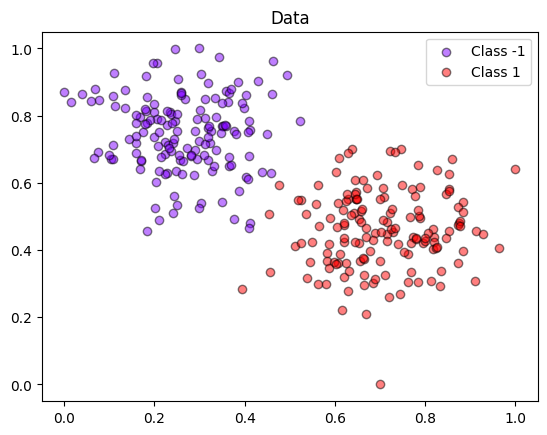

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

X, y = make_blobs(n_samples=300, n_features=2, centers=2, random_state=115)
X = minmax_scale(X)
y = 2 * y - 1 #convert labels to -1, 1
plot_data(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

Queremos encontrar una función lineal $f(x) = wx+w_0$ con parámetros $w \in \mathbb{R}^2$, $w_0 \in \mathbb{R}$. Formulamos el problema como un problema de optimización:

$$\min_{f\in H}L(f,D)$$

Donde:
* $H$ es el espacio de hipótesis definido como $H=\{f_{w, w_0}(x)=wx+w_0,\forall w\in\mathbb{R}^2 \ and \ w_0\in\mathbb{R}\}$.
* $L$ es la función de pérdida definida como $ L(f, D) =\frac{1}{2}\sum_{(x^{(i)},y^{(i)})\in D} (f(x^{(i)}) - y^{(i)})^2 $.
* $(x^{(i)},y^{(i)})$ es una muestra de entrenamiento donde $y^{(i)}$ es la entrada y $y^{(i)}$ es la etiqueta.
* $D$ corresponde al conjunto de datos de entrenamiento.



Input features: [0.41104796 0.48114158]
True label: -1
Predicted label: -1.1309687949457081
Training loss: 66.48973872489228
Test loss: 31.3286527270759


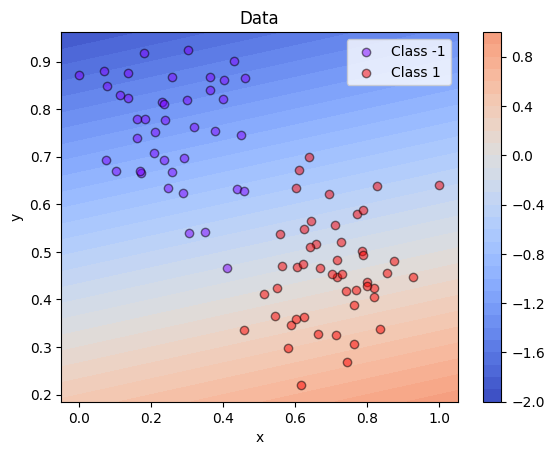

In [3]:
w = np.array([1, .5, -3])
x = X_train[0]
label = y_train[0]

model = LinearClassifier(w_init=w)

print('Input features: {}'.format(X[0]))
print('True label: {}'.format(y[0]))
print('Predicted label: {}'.format(model.f(x)))
print(f'Training loss: {model.loss(X_train, y_train)}')
print(f'Test loss: {model.loss(X_test, y_test)}')
plot_decision_region(X_test, lambda x_1, x_2: model.f([x_1, x_2]))
plot_data(X_test, y_test)

Utilizaremos descenso de gradiente para minimizar la pérdida. Para ello necesitamos calcular el gradiente de la función de pérdida con respecto a los parámetros.


$$
\begin{aligned} \frac{\partial L(f, D)}{\partial w} & =\frac{1}{2}\sum_{(x^{(i)},y^{(i)})\in D} \frac{\partial (f(x^{(i)}) - y^{(i)})^2}{\partial w}  
\end{aligned}
$$
con
$$
\begin{aligned}
\frac{\partial (f(x^{(i)}) - y^{(i)})^2}{\partial w} & =
\frac{\partial (w_1 x_1^{(i)} + w_2 x_2^{(i)} + w_0 - y^{(i)})^2}{\partial w} \\
& =(f_{w}(x^{(i)})-y^{(i)})\left[\begin{array}{c}
1 \\
x_1^{(i)}\\
x_2^{(i)}\\
\end{array}\right]
\end{aligned}
$$

A continuación, definimos una función para calcular el gradiente:

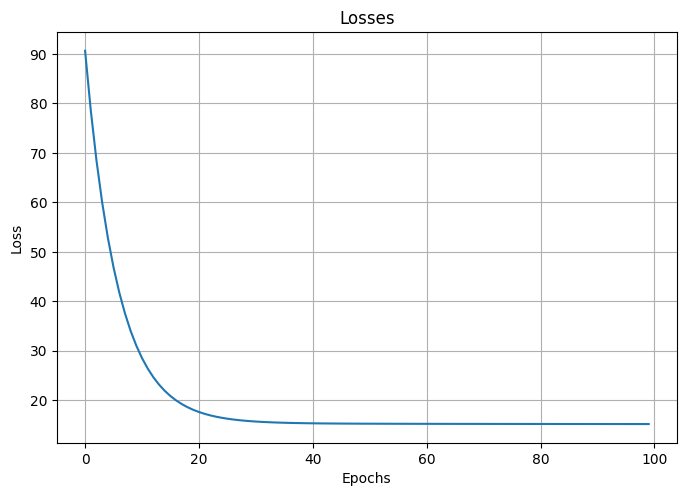

In [4]:
model = LinearClassifier(w_init=np.array([0,0,0]))
losses = model.fit(X_train, y_train, learning_rate=0.005, epochs=100)
plot_losses(losses)

Input features: [0.41104796 0.48114158]
True label: -1
Predicted label: -0.6702910366754345
Training loss: 15.177415010182102
Test loss: 7.121063254056547


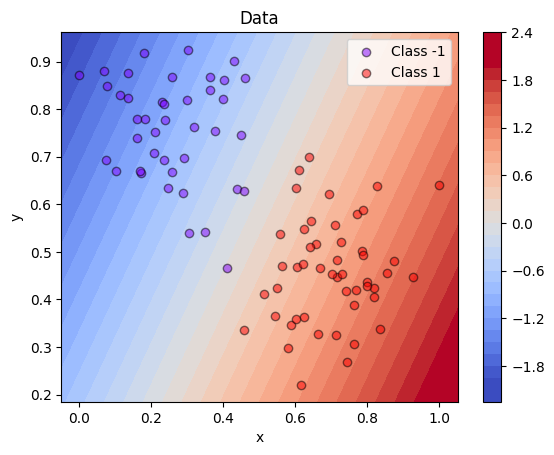

In [5]:
print('Input features: {}'.format(X[0]))
print('True label: {}'.format(y[0]))
print('Predicted label: {}'.format(model.f(x)))
print(f'Training loss: {model.loss(X_train, y_train)}')
print(f'Test loss: {model.loss(X_test, y_test)}')
plot_decision_region(X_test, lambda x_1, x_2: model.f([x_1, x_2]))
plot_data(X_test, y_test)

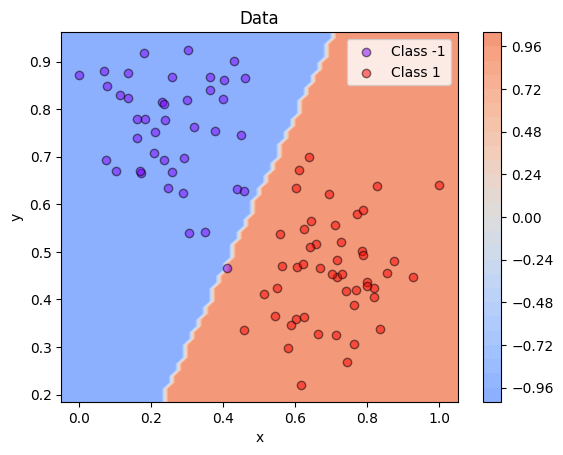

In [6]:
plot_decision_region(X_test, lambda x_1, x_2: model.predict([x_1, x_2]))
plot_data(X_test, y_test)

In [7]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      0.98      0.99        41
     Class 1       0.98      1.00      0.99        49

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90



## 1. Regresión logística

Consulte que es la regresión logística y adapte el código para hacer regresión logística.

Visualice la región de decisión. Discuta los resultados. ¿Qué cambia?

El modelo logístico corresponde a una versión del modelo lineal ya estudiado cuya salida es acotada entre 0 y 1 por la función sigmoide. En este escenario, el modelo se ve de la siguiente forma:

$$f_w(\vec{x}) = x_1 \cdot w_1 + x_2 \cdot w_2 + ... + x_n \cdot w_n + w_0  $$

$$f_\sigma (\vec{x}) = \sigma (f_w(\vec{x}))  \quad \quad \text{donde} \quad \quad \sigma(x) = \dfrac{1}{1+e^{-x}}$$

En este nuevo escenario, la salida del modelo puede entenderse como una probabilidad de clasificar un elemento en una clase particular. Dado esto, podemos replantear usar una función de pérdida diferente, en este caso, usaremos la entropría cruzada binaria (Binary Cross-Entropy or BCE), que se define como:

$$BCE(f_\sigma , D) = - \dfrac{1}{N} \sum_{(x^{(i)} , y^{(i)}) \in D} y^{(i)} \log(f_\sigma(x^{(i)})) + (1- y^{(i)} )\log(1 - f_\sigma(x^{(i)}))$$

En este escenario, podemos calcular el gradiente de la función. Para ello, aprovecharemos la regla de la cadena y los resultados que ya conocemos del modelo lineal.

$$\dfrac{\partial f_\sigma(x^{(i)})}{\partial w} = \dfrac{\partial f_\sigma(x^{(i)})}{\partial f_w(x^{(i)})} \cdot \dfrac{\partial f_w(x^{(i)})}{\partial w} = f_\sigma(x^{(i)}) \cdot \sigma(1 - f_w(x^{(i)})) \cdot \left[\begin{array}{c}
1 \\
x_1^{(i)}\\
\vdots \\
x_n^{(i)}
\end{array}\right]$$

$$\dfrac{\partial BCE}{\partial w} = - \dfrac{1}{N} \sum_{(x^{(i)} , y^{(i)}) \in D} y^{(i)} \dfrac{\partial}{\partial w}   \log(f_\sigma(x^{(i)})) + (1- y^{(i)} ) \dfrac{\partial}{\partial w}  \log(1 - f_\sigma(x^{(i)}))$$

$$\dfrac{\partial BCE}{\partial w} = - \dfrac{1}{N} \sum_{(x^{(i)} , y^{(i)}) \in D} \dfrac{ y^{(i)}}{f_\sigma(x^{(i)})} \dfrac{\partial f_\sigma(x^{(i)})}{\partial w}  + \dfrac{(1- y^{(i)} )}{1 - f_\sigma(x^{(i)})} \dfrac{\partial}{\partial w}  \left(1 - f_\sigma(x^{(i)})\right)$$

$$\dfrac{\partial BCE}{\partial w} = - \dfrac{1}{N} \sum_{(x^{(i)} , y^{(i)}) \in D} \dfrac{ y^{(i)}}{f_\sigma(x^{(i)})} \dfrac{\partial f_\sigma(x^{(i)})}{\partial w}  + \dfrac{(1- y^{(i)} )}{1 - f_\sigma(x^{(i)})} \dfrac{\partial f_\sigma(x^{(i)})}{\partial w} $$

$$\dfrac{\partial BCE}{\partial w} = - \dfrac{1}{N} \sum_{(x^{(i)} , y^{(i)}) \in D} \left( \dfrac{ y^{(i)}}{f_\sigma(x^{(i)})}   + \dfrac{(1- y^{(i)} )}{1 - f_\sigma(x^{(i)})} \right) \cdot \dfrac{\partial f_\sigma(x^{(i)})}{\partial w}$$

$$\dfrac{\partial BCE}{\partial w} = \dfrac{1}{N} \sum_{(x^{(i)} , y^{(i)}) \in D} \dfrac{f_\sigma(x^{(i)}) - y^{(i)}}{f_\sigma(x^{(i)}) (1-f_\sigma(x^{(i)}))} \cdot \dfrac{\partial f_\sigma(x^{(i)})}{\partial w}$$

$$\dfrac{\partial BCE}{\partial w} =  \dfrac{1}{N} \sum_{(x^{(i)} , y^{(i)}) \in D} \dfrac{f_\sigma(x^{(i)}) - y^{(i)}}{f_\sigma(x^{(i)}) (1-f_\sigma(x^{(i)}))} \cdot f_\sigma(x^{(i)}) \cdot \sigma(1 - f_w(x^{(i)})) \cdot \left[\begin{array}{c}
1 \\
x_1^{(i)}\\
\vdots \\
x_n^{(i)}
\end{array}\right]$$

$$\dfrac{\partial BCE}{\partial w} = \dfrac{1}{N} \sum_{(x^{(i)} , y^{(i)}) \in D} \dfrac{f_\sigma(x^{(i)}) - y^{(i)}}{1-f_\sigma(x^{(i)})} \cdot \sigma(1 - f_w(x^{(i)})) \cdot \left[\begin{array}{c}
1 \\
x_1^{(i)}\\
\vdots \\
x_n^{(i)}
\end{array}\right]$$

Finalmente, con esta expresión podemos hacer el proceso de gradiente descendente de manera homónima a lo que se hizo en el ejercicio del clasificador lineal.

La implementación completa esta en la clase [`LogisticClassifier`](https://github.com/omardtl24/ISI2025-1/blob/main/AI_algorithms/ml/supervised/linear/LogisticClassifier.py)

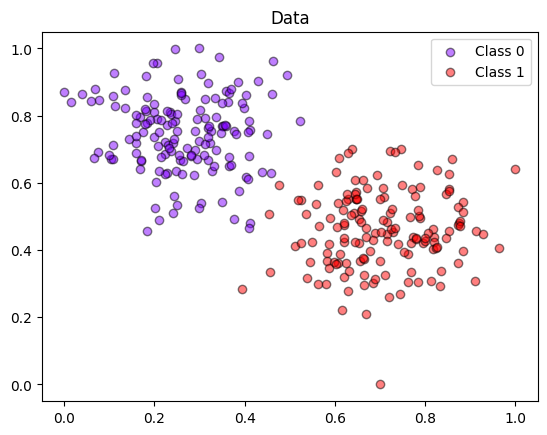

In [8]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

X, y = make_blobs(n_samples=300, n_features=2, centers=2, random_state=115)
X = minmax_scale(X)
plot_data(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

Podemos probar la salida del modelo; y a diferencia del modelo lineal original, es evidente que esta acotada entre 0 y 1 gracias a la función sigmoide

Input features: [0.41104796 0.48114158]
True label: 0
Predicted label: 0.24398235754621786
Training loss: 0.5020741023406695
Test loss: 0.5233994197561244


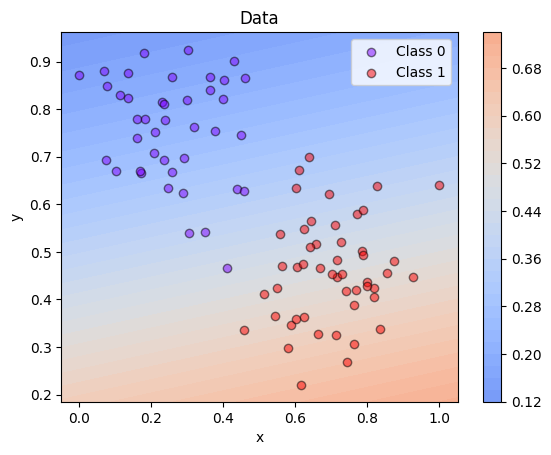

In [9]:
w = np.array([1, .5, -3])
x = X_train[0]
label = y_train[0]

model = LogisticClassifier(w_init=w)

print('Input features: {}'.format(X[0]))
print('True label: {}'.format(y[0]))
print('Predicted label: {}'.format(model.f(x)))
print(f'Training loss: {model.loss(X_train, y_train)}')
print(f'Test loss: {model.loss(X_test, y_test)}')
plot_decision_region(X_test, lambda x_1, x_2: model.f([x_1, x_2]),vmin=-.1, vmax=1.1)
plot_data(X_test, y_test)

Entrenamos el modelo usando gradiente descendente

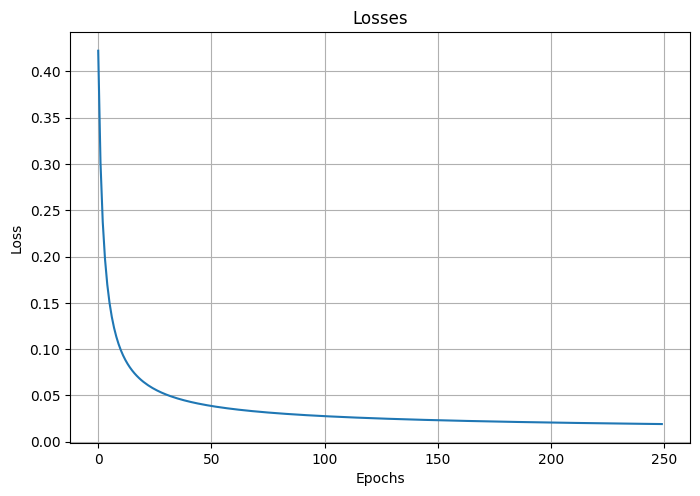

In [10]:
model = LogisticClassifier(w_init=np.array([0,0,0]))
losses = model.fit(X_train, y_train, learning_rate=0.1, epochs=250, mode='stochastic')
plot_losses(losses)

Input features: [0.41104796 0.48114158]
True label: 0
Predicted label: 0.00455682346334128
Training loss: 0.018923929304359006
Test loss: 0.026078620506921772


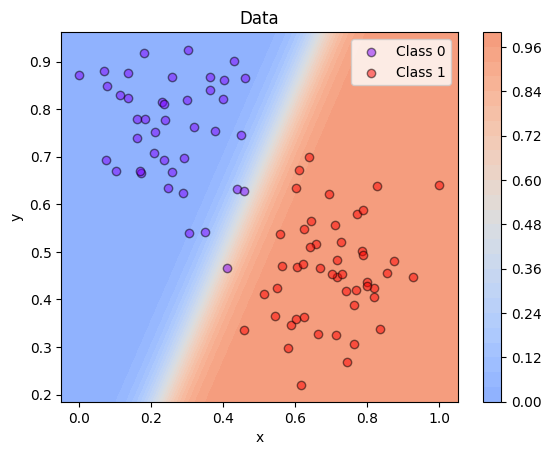

In [11]:
print('Input features: {}'.format(X[0]))
print('True label: {}'.format(y[0]))
print('Predicted label: {}'.format(model.f(x)))
print(f'Training loss: {model.loss(X_train, y_train)}')
print(f'Test loss: {model.loss(X_test, y_test)}')
plot_decision_region(X_test, lambda x_1, x_2: model.f([x_1, x_2]),vmin=-.5, vmax=1.5)
plot_data(X_test, y_test)

Despues del entrenamiento, podemos ver que el modelo se ajusta bastante bien para la tarea de clasificación lineal. Ahora veremos exactamente la frontera que diferencia las dos clases dada la tolerancia $0.5$ para definir si una muestra pertenece a la clase 0 o a la clase 1

Input features: [0.41104796 0.48114158]
True label: 0
Predicted label: 0.00455682346334128
Training loss: 0.018923929304359006
Test loss: 0.026078620506921772


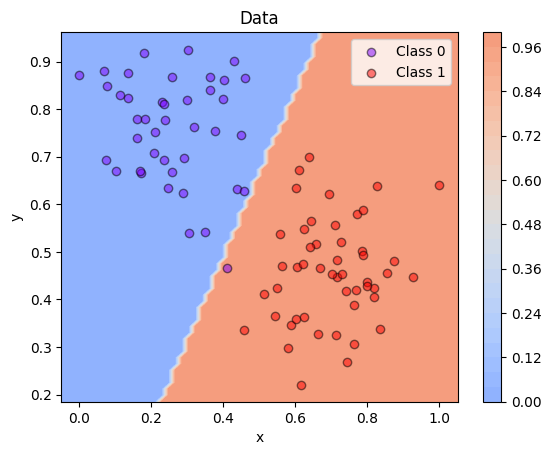

In [12]:
print('Input features: {}'.format(X[0]))
print('True label: {}'.format(y[0]))
print('Predicted label: {}'.format(model.f(x)))
print(f'Training loss: {model.loss(X_train, y_train)}')
print(f'Test loss: {model.loss(X_test, y_test)}')
plot_decision_region(X_test, lambda x_1, x_2: model.predict([x_1, x_2]),vmin=-.5, vmax=1.5)
plot_data(X_test, y_test)

In [13]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       1.00      0.98      0.99        41
     Class 1       0.98      1.00      0.99        49

    accuracy                           0.99        90
   macro avg       0.99      0.99      0.99        90
weighted avg       0.99      0.99      0.99        90



## 2. Clasificación multiclase

Adapte el código para hacer clasificación multiclase. Aplique el método al conjunto de datos Wine (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html).

Divida los datos en entrenamiento y prueba.

Calcule la matriz de confusion para el conjunto de prueba.

Calcule diferentes métricas de desempeño del algoritmo.

Discuta los resultados.

### 1. Cargamos el conjunto de datos

In [14]:
from sklearn.datasets import load_wine

wine = load_wine()

X = wine.data
y = wine.target

feature_names = wine.feature_names
target_names = wine.target_names
description = wine.DESCR

In [15]:
X.shape , y.shape

((178, 13), (178,))

In [16]:
print(description)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [17]:
print(feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [18]:
print(target_names)

['class_0' 'class_1' 'class_2']


### 2. Separar el conjunto de datos en entrenamiento y prueba

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')

print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (124, 13)
y_train shape: (124,)
X_test shape: (54, 13)
y_test shape: (54,)


### 3. Entrenamos un modelo de regresión logistica

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [21]:
y_pred = model.predict(X_test)
y_pred.shape

(54,)

### 4. Matriz de confusión

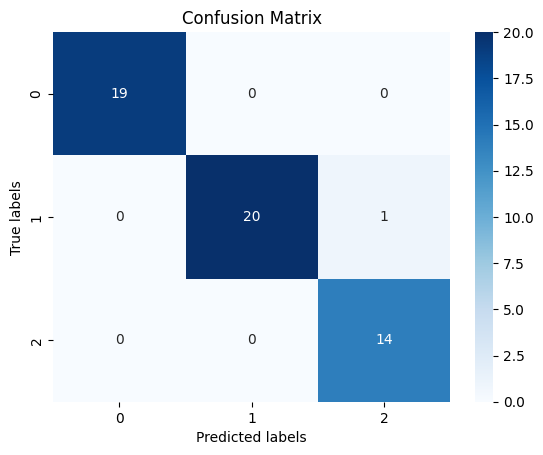

In [22]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### 5. Generamos diferentes metricas

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      0.95      0.98        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



### 6. Conclusiones

Con base en los resultados obtenidos mediante el reporte de clasificación, se puede concluir que el modelo presenta un desempeño razonable en la predicción de las clases definidas. Las métricas de precisión, recall y F1-score permiten identificar el nivel de aciertos y errores en cada categoría, evidenciando fortalezas en algunas clases y áreas de mejora en otras. Estos resultados ofrecen una base útil para evaluar la efectividad del modelo y guiar futuros ajustes o mejoras en los datos y la arquitectura del algoritmo.